## Creating CNN Using Scratch And Transfer Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Dog_Cat_Classification

/content/drive/MyDrive/Dog_Cat_Classification


In [ ]:
ls

AccVal_acc.png                 Dataset/          jpt.h5            __pycache__/
CatAndDogClassification.ipynb  DogsVsCats.ipynb  jpt.ipynb         setting.py
CatVsDog.h5                    DogVsCat.ipynb    LossVal_loss.png  try.ipynb


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential


import setting as cfg

In [ ]:
#setting an image size to be used for the model
IMAGE_SIZE = [224, 224]

train_path = cfg.TrainDir
test_path = cfg.TestingDir


In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
###CNN model creation
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dog_Cat_Classification/Dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8041 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
#testing set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dog_Cat_Classification/Dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [ ]:
#fitting and running the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
252/252 [==============================] - 2755s 11s/step - loss: 0.7006 - accuracy: 0.6299 - val_loss: 0.5860 - val_accuracy: 0.6886
Epoch 2/20
252/252 [==============================] - 421s 2s/step - loss: 0.5447 - accuracy: 0.7214 - val_loss: 0.5380 - val_accuracy: 0.7355
Epoch 3/20
252/252 [==============================] - 425s 2s/step - loss: 0.5083 - accuracy: 0.7502 - val_loss: 0.4963 - val_accuracy: 0.7672
Epoch 4/20
252/252 [==============================] - 434s 2s/step - loss: 0.4784 - accuracy: 0.7663 - val_loss: 0.4777 - val_accuracy: 0.7746
Epoch 5/20
252/252 [==============================] - 425s 2s/step - loss: 0.4523 - accuracy: 0.7892 - val_loss: 0.5421 - val_accuracy: 0.7365
Epoch 6/20
252/252 [==============================] - 424s 2s/step - loss: 0.4300 - accuracy: 0.8050 - val_loss: 0.4716 - val_accuracy: 0.7835
Epoch 7/20
252/252 [==============================] - 425s 2s/step - loss: 0.4105 - accuracy: 0.8113 - val_loss: 0.4474 - val_accuracy: 0.79

In [ ]:
#saving the recently run model
model.save('CatVsDog.h5')

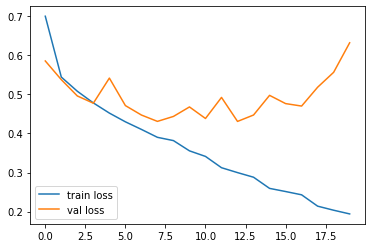

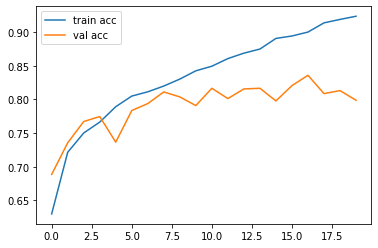

<Figure size 432x288 with 0 Axes>

In [ ]:
# ploting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('CatVsDog.h5')

In [ ]:
results = model.evaluate(test_set, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.63258
Test Accuracy: 79.88%


In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[1.0188403e-08, 1.0000000e+00],
       [9.4418281e-01, 5.5817198e-02],
       [4.3476617e-04, 9.9956518e-01],
       ...,
       [7.0846285e-04, 9.9929154e-01],
       [4.9132553e-01, 5.0867444e-01],
       [2.1610286e-02, 9.7838974e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
img=image.load_img('Dataset/Val/Cat/cat2.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)/255

In [ ]:
input_arr = np.array([x])
input_arr.shape

(1, 224, 224, 3)

In [ ]:
img=image.load_img('Dataset/Val/Cat/cat2.jpg',target_size=(224,224))
x=image.img_to_array(img)/255

input_arr = np.array([x])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("Cat")
else:
  print("Dog")


Cat


In [ ]:
#inserting image and checking the result of model prediction
img=image.load_img('Dataset/Val/Dog/dog2.jpg',target_size=(224,224))
x=image.img_to_array(img)/255

input_arr = np.array([x])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("Cat")
else:
  print("Dog")


Dog


In [ ]:
#importing libraries for confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

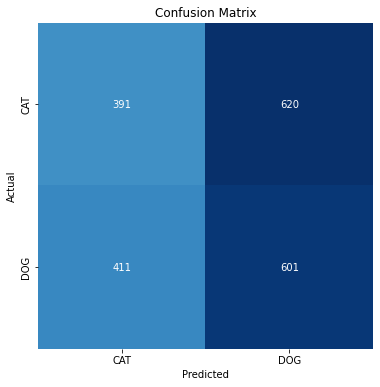

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.49      0.39      0.43      1011
         DOG       0.49      0.59      0.54      1012

    accuracy                           0.49      2023
   macro avg       0.49      0.49      0.48      2023
weighted avg       0.49      0.49      0.48      2023



In [ ]:
cm = confusion_matrix(test_set.labels, y_pred, labels=[0, 1])
clr = classification_report(test_set.labels, y_pred, labels=[0, 1], target_names=["CAT", "DOG"])
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)